# Disease Prediction from Medical Data

### 1.Import Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

### 2.Load Dataset

In [5]:
data=pd.read_csv("C://Users//Admin//OneDrive//Documents//heart.csv")

In [6]:
print(data)

     age  sex  cp  trtbps  thalachh  exng  oldpeak  caa  thall  output
0     60    1   3     145       150     0      2.3    0      1       1
1     35    1   2     130       187     0      3.5    0      2       1
2     41    0   1     130       172     0      1.4    0      2       1
3     55    1   1     120       178     0      0.8    0      2       1
4     56    0   0     120       163     1      0.6    0      2       1
..   ...  ...  ..     ...       ...   ...      ...  ...    ...     ...
284   60    1   0     140       138     1      1.9    1      3       0
285   46    1   0     140       120     1      1.8    2      3       0
286   59    1   3     134       162     0      0.8    2      2       0
287   54    1   1     154       164     0      0.0    1      2       0
288   53    1   0     110       143     1      3.0    1      3       0

[289 rows x 10 columns]


#### Features(x) and Target(y)

In [7]:
X=data[['age','sex','cp','trtbps','thalachh','exng','oldpeak','caa','thall']]
Y=data['output']

### 3.Train-Test Split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### 4.Model Training

In [12]:
models={
    "Logistic Regression":
LogisticRegression(max_iter=1000),
    "Decision Tree":
DecisionTreeClassifier(random_state=42),
    "Random Forest":
RandomForestClassifier(random_state=42),
    "SVM":SVC(kernel='Linear'),
    "KNM":
KNeighborsClassifier(n_neighbors=5)
    }

In [13]:
from sklearn.svm import SVC
models={
    "SVM":SVC(kernel="linear",probability=True),
}

### 5.Prediction And Evaluation

In [14]:
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)

In [15]:
print("="*40)
print(f"model:{name}")
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred,target_names=["No Disease","Disease"]))

model:SVM
Accuracy: 0.8103448275862069
Classification Report:
               precision    recall  f1-score   support

  No Disease       0.83      0.74      0.78        27
     Disease       0.79      0.87      0.83        31

    accuracy                           0.81        58
   macro avg       0.81      0.81      0.81        58
weighted avg       0.81      0.81      0.81        58



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
cm=confusion_matrix(Y_test,Y_pred)

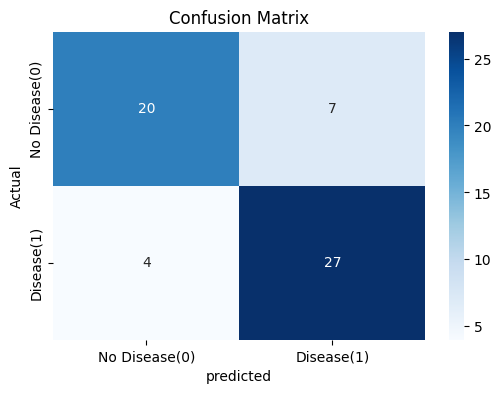

In [18]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,fmt="d",cmap="Blues",
            xticklabels=["No Disease(0)","Disease(1)"],
            yticklabels=["No Disease(0)","Disease(1)"])
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 6.Final Output

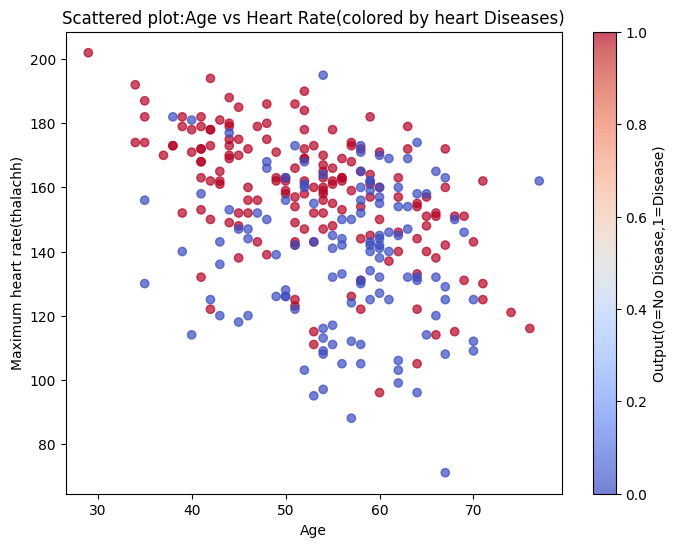

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(data['age'],data['thalachh'],c=data['output'],cmap='coolwarm',alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Maximum heart rate(thalachh)")
plt.title("Scattered plot:Age vs Heart Rate(colored by heart Diseases)")
plt.colorbar(label="Output(0=No Disease,1=Disease)")
plt.show()